In [54]:
%%time
import numpy as np
import pandas as pd
import bz2
import re
import emoji
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
from gingerit.gingerit import GingerIt
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from spellchecker import SpellChecker
import traceback
import sys
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from textblob import TextBlob
from textblob import Word
from wordcloud import WordCloud 
import operator
import spacy
from scipy.stats import iqr
from dask import delayed, compute
import dask
import dask.dataframe as dd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings,os
warnings.filterwarnings('ignore')
from keras.models import load_model 
import pickle
from ScoreVecClassifier import ScoreVecClassifier
SarcasmDetectionModel = load_model("SarcasmDetectionGloveModel.h5") 
doc_file = open("ScoreVecClassifierCLass.pickle","rb")
ScoreVecClassifierCLass = pickle.load(doc_file)
doc_file = open("SarcasmDectectionTokenizer.pickle","rb")
SarcasmDectectionTokenizer = pickle.load(doc_file)
ScoreVecClassifier = ScoreVecClassifierCLass['classifier']
vectorizer = ScoreVecClassifierCLass['vectorizer']
accuracy_dict = ScoreVecClassifierCLass['accuracy_dict']
tokenizer= SarcasmDectectionTokenizer['tokenizer']
from keras.preprocessing import text, sequence
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from SentimentAnaylsisUtility import SentimentAnaylsisUtility
utility = SentimentAnaylsisUtility()
from tqdm._tqdm_notebook import tqdm_notebook
from tqdm import tqdm
nltk.download('vader_lexicon')
tqdm_notebook.pandas()
import ast
accuracy_dict=ast.literal_eval(accuracy_dict)

Wall time: 47.3 s


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Iamga\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<Figure size 1152x504 with 0 Axes>

In [3]:
%%time
#Intialization
lemmatizer = WordNetLemmatizer()
spell = SpellChecker()
parser = GingerIt()
plt.figure(figsize=(16,7))
plt.style.use('ggplot')
nlp = spacy.load("en_core_web_sm")
analyser = SentimentIntensityAnalyzer()
#Custom Dictionary
CONTRACTIONS = { "ain't": "is not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he he will have", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "so's": "so as", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" } 
SMILEY={"^_^":"smiley",":‑)":"smiley", ":-]":"smiley", ":-3":"smiley", ":->":"smiley", "8-)":"smiley", ":-}":"smiley", ":)":"smiley", ":]":"smiley", ":3":"smiley", ":>":"smiley", "8)":"smiley", ":}":"smiley", ":o)":"smiley", ":c)":"smiley", ":^)":"smiley", "=]":"smiley", "=)":"smiley", ":-))":"smiley", ":‑D":"smiley", "8‑D":"smiley", "x‑D":"smiley", "X‑D":"smiley", ":D":"smiley", "8D":"smiley", "xD":"smiley", "XD":"smiley", ":‑(":"sad", ":‑c":"sad", ":‑<":"sad", ":‑[":"sad", ":(":"sad", ":c":"sad", ":<":"sad", ":[":"sad", ":-||":"sad", ">:[":"sad", ":{":"sad", ":@":"sad", ">:(":"sad", ":'‑(":"sad", ":'(":"sad", ":‑P":"playful", "X‑P":"playful", "x‑p":"playful", ":‑p":"playful", ":‑Þ":"playful", ":‑þ":"playful", ":‑b":"playful", ":P":"playful", "XP":"playful", "xp":"playful", ":p":"playful", ":Þ":"playful", ":þ":"playful", ":b":"playful", "<3":"love" }
STOP_WORDS = {"ourselves", "hers", "between", "yourself", "but", "again", "there", "about", "once", "during", "out", "very", "having", "with", "they", "own", "an", "be", "some", "for", "do", "its", "yours", "such", "into", "of", "most", "itself", "other", "off", "is", "s", "am", "or", "who", "as", "from", "him", "each", "the", "themselves", "until", "below", "are", "we", "these", "your", "his", "through", "don", "nor", "me", "were", "her", "more", "himself", "this", "down", "should", "our", "their", "while", "above", "both", "up", "to", "ours", "had", "she", "all", "no", "when", "at", "any", "before", "them", "same", "and", "been", "have", "in", "will", "on", "does", "yourselves", "then", "that", "because", "what", "over", "why", "so", "can", "did", "now", "under", "he", "you", "herself", "has", "just", "where", "too", "only", "myself", "which", "those", "i", "after", "few", "whom", "t", "being", "if", "theirs", "my", "against", "a", "by", "doing", "it", "how", "further", "was", "here", "than","book"}
TAG_DICTIONARY = {"J": wordnet.ADJ,"N": wordnet.NOUN,"V": wordnet.VERB,"R": wordnet.ADV}
all_stopwords = nlp.Defaults.stop_words

Wall time: 1.07 s


<Figure size 1152x504 with 0 Axes>

In [11]:
%%time
#remove special character
def pre_processing(text):
    text=text.replace('\\n','')
    text=text.replace('\'s','+s')
    text=text.replace('\\','')
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in text.split()]
    text = " ".join(reformed)
    text = emoji.demojize(text)
    reformed = [SMILEY[word] if word in SMILEY else word for word in text.split()]
    text = " ".join(reformed)
    text = ' '.join(re.sub('[^A-Za-z0-9 _+-,.]+', '', text).split())
    return text

def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

def getDocumentSentimentList(docs,splitStr='__label__'):
    docSentimentList=[]
    for i in tqdm(range(len(docs))):
        try:
            text=str(lines[i])
            splitText=text.split(splitStr)
            secHalf=splitText[1]
            text=secHalf[2:len(secHalf)-1]
            sentiment=secHalf[0]
            docSentimentList.append([text,sentiment])
        except:
            print("error");
            
    return docSentimentList;

def get_rare_words():
    most_rare=[]
    freq = pd.Series(' '.join(train_df['Pre_processed']).split(),name="rare_count").value_counts()
    freqDF=freq.to_frame()
    freqDF = freqDF[freqDF.rare_count ==1]
    return list(freqDF.index)

def check_grammar(text):
    try:
        #text=parser.parse(text)['result']
        text=spell.correction(text)
    except Exception:
        traceback.print_exc()
        
    return text

def pos_tagging(tokenized):
    wordsList = nltk.word_tokenize(tokenized) 
    return nltk.pos_tag(wordsList)

def lemmatize(wordList):
   lemmatizedString ='' 
   for word in wordList:
        try:
            text = word[0];
            tag=TAG_DICTIONARY.get(word[1][0].upper(), wordnet.NOUN);
            lemmatizedString=lemmatizedString +" "+Word(text).lemmatize(tag)
        except:
            print("error")
            lemmatizedString=lemmatizedString;
   lemmatizedString=lemmatizedString.replace('.',' ')
   lemmatizedString=lemmatizedString.replace(',',' ')
   return lemmatizedString.strip();

def moreCompactKeyword(review):
    cleaned = list()
    review=TextBlob(review)
    for phrase in review.noun_phrases:
        count = 0
        for word in phrase.split():
            # Count the number of small words and words without an English definition
            if len(word) <= 2 or (not Word(word).definitions):
                count += 1
        # Only if the 'nonsensical' or short words DO NOT make up more than 40% (arbitrary) of the phrase add
        # it to the cleaned list, effectively pruning the ones not added.
        if count < len(phrase.split())*0.4:
            cleaned.append(phrase)
    
    for phrase in cleaned:    
        match = list()
        temp = list()
        word_match = list()
        for word in phrase.split():
            # Find common words among all phrases
            word_match = [p for p in cleaned if re.search(word, p) and p not in word_match]
            # If the size of matched phrases set is smaller than 30% of the cleaned phrases, 
            # then consider the phrase as non-redundant.
            if len(word_match) <= len(cleaned)*0.3 :
                temp.append(word)
                match += word_match

        phrase = ' '.join(temp)
    #     print("Match for " + phrase + ": " + str(match))

        if len(match) >= len(cleaned)*0.1 :
            # Redundant feature set, since it contains more than 10% of the number of phrases. 
            # Prune all matched features.
            for feature in match:
                if feature in cleaned:
                    cleaned.remove(feature)

            # Add largest length phrase as feature
            cleaned.append(max(match, key=len))
    return cleaned

def compactKeyword(review):
    cleaned = list()
    review=TextBlob(review)
    for phrase in review.noun_phrases:
        count = 0
        for word in phrase.split():
            # Count the number of small words and words without an English definition
            if len(word) <= 2 or (not Word(word).definitions):
                count += 1
        # Only if the 'nonsensical' or short words DO NOT make up more than 40% (arbitrary) of the phrase add
        # it to the cleaned list, effectively pruning the ones not added.
        if count < len(phrase.split())*0.4:
            containsAdjectiveAdverb=False
            tokens = nlp(str(phrase))
            for token in tokens:
                if(str(token.tag_).startswith("J") or str(token.tag_).startswith("R")):
                    containsAdjectiveAdverb=True;
                    break;
            if(containsAdjectiveAdverb):    
                cleaned.append(phrase)
    return cleaned

def fix_punctuation(text):
    text=text.replace('\\n','')
    text=text.replace('\'s','+s')
    text=text.replace('\\','')
    text=text.replace('.','. ')
    text=text.replace(',',', ')
    text=re.sub(' +', ' ',text)
    return text;

def spacy_pre_processing(text):
    cleaned_text = list()
    text=text.lower()
    text = " ".join([CONTRACTIONS[word] if word in CONTRACTIONS else word for word in text.split()])
    text = emoji.demojize(text)
    text = " ".join([SMILEY[word] if word in SMILEY else word for word in text.split()])
    text = ' '.join(re.sub('[^A-Za-z0-9 +]+', ' ', text).split())
    text = " ".join([w for w in text.split() if not w in STOP_WORDS])
    return text

def keyword_score(keywords):
    score=0.0;
    for keyword in keywords:
        score=score+TextBlob(keyword).sentiment.polarity
    return score

def neutralScore(sentence):
    score = analyser.polarity_scores(sentence)
    return round(score['neu']-score['neg']+score['pos'],3);
    #return round(score['neu'],3);

def vaderScore(sentence):
    score = analyser.polarity_scores(sentence)
    return round(score['compound'],3);

def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
def getConfusionMatrixScore(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    sensitivity  = TP / (TP+FN)
    specificity  = TN / (TN+FP)
    pos_pred_val = TP/ (TP+FP)
    neg_pred_val = TN/ (TN+FN)
    return round(sensitivity,3),round(specificity,3),round(pos_pred_val,3),round(neg_pred_val,3)

Wall time: 0 ns


In [12]:
%%time
trainfile = bz2.BZ2File('train.ft.txt.bz2','r')
lines = trainfile.readlines()


Wall time: 1min 22s


In [13]:
%%time
docSentimentList=[]
train_df = pd.DataFrame() 
docSentimentList=utility.getDocumentSentimentList(lines[50000:65000],splitStr='__label__')
train_df = pd.DataFrame(docSentimentList,columns=['Index','Text','Sentiment'])

Wall time: 289 ms


In [14]:
train_df.shape

(15000, 3)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Index      15000 non-null  int64 
 1   Text       15000 non-null  object
 2   Sentiment  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [16]:
train_df.isnull().sum()

Index        0
Text         0
Sentiment    0
dtype: int64

In [17]:
train_df[["Sentiment"]] = train_df[["Sentiment"]].apply(pd.to_numeric)
train_df.head(5)

,Index,Text,Sentiment
0,1,Just what I expected: I wasn't expecting much ...,2
1,2,"Garbage: The not accurate at all, constantly r...",1
2,3,Cheap! You get what you pay for!: I am pretty ...,1
3,4,"Good quality, but no fraction support: The bui...",2
4,5,bad quality caliper: This item arrived with an...,1


In [18]:
%%time
#train_df['Pre_processed'] = train_df['Text'].apply(lambda x: " ".join(x for x in word_tokenize(pre_processing(x))))
train_df['Text'] = train_df['Text'].apply(lambda x:fix_punctuation(x))
train_df['Text'] = train_df['Text'].apply(lambda x:utility.remove_URL(x))
train_df['Text'] = train_df['Text'].apply(lambda x:utility.remove_html(x))
train_df['Pre_processed'] = train_df['Text'].progress_apply(lambda x:utility.spacy_pre_processing(x))



Wall time: 37 s


In [19]:
%%time
#Basic Feature Extraction
train_df['Sentence_count'] = train_df['Text'].progress_apply(lambda x: len(sent_tokenize(x)))
train_df['Review_Length'] = train_df['Pre_processed'].progress_apply(lambda x: len(x))
train_df['Word_count'] = train_df['Pre_processed'].progress_apply(lambda x: len(word_tokenize(x)))
train_df['Keywords'] = train_df['Text'].progress_apply(lambda x: compactKeyword(x))
train_df['Keyword_score'] = train_df['Keywords'].progress_apply(lambda x: round(keyword_score(x),3))
train_df['KeyWord_Count'] = train_df['Keywords'].progress_apply(lambda x: len(x))
train_df['Subjectivity'] = train_df['Pre_processed'].progress_apply(lambda x: round(TextBlob(x).sentiment.subjectivity,3))



Wall time: 12min 49s


In [20]:
train_df['NeutralScore'] = train_df['Pre_processed'].progress_apply(lambda x:neutralScore(x))
train_df['VaderScore'] = train_df['Text'].progress_apply(lambda x:vaderScore(utility.fix_punctuation(x)))
train_df.head(5)


,Index,Text,Sentiment,Pre_processed,Sentence_count,Review_Length,Word_count,Keywords,Keyword_score,KeyWord_Count,Subjectivity,NeutralScore,VaderScore
0,1,Just what I expected: I wasn't expecting much ...,2,expected not expecting much ordered calipers n...,10,491,71,"[extra battery, hard plastic case]",-0.292,2,0.483,0.898,0.959
1,2,"Garbage: The not accurate at all, constantly r...",1,garbage not accurate constantly resets randoml...,2,87,13,[],0.000,0,0.489,1.000,0.000
2,3,Cheap! You get what you pay for!: I am pretty ...,1,cheap get pay pretty upset first person review...,5,257,37,"[cheap, pretty upset, own hobby]",1.250,3,0.562,0.700,0.556
3,4,"Good quality, but no fraction support: The bui...",2,good quality fraction support build quality ca...,6,514,69,"[good quality, discernible play, extra battery...",0.900,5,0.541,0.888,0.077
4,5,bad quality caliper: This item arrived with an...,1,bad quality caliper item arrived extra piece b...,1,135,22,"[bad quality caliper, extra piece]",-0.700,2,0.356,0.280,-0.821


In [21]:
rowCount=174
print(train_df['Text'][rowCount])
print()
print(train_df['Pre_processed'][rowCount])
print()
#print(train_df['Pos_tagged'][rowCount])
#print()
#print(train_df['Lemmatized'][rowCount])
#print()
#print(train_df['Semi_Final'][rowCount])
#print()
#print(train_df['Final'][rowCount])
print()
print(train_df['Keywords'][rowCount])
#print()
#print(train_df['Compact_Keywords'][rowCount])

Disappointed!: The metal rods have bent after using it on 14 cans rendering it unusable! In fact , it bent on a Smaller Tomato paste can. Can't say I would recommend this product based on my experience - also , takes some force to crush the cans to 3/4 of there size - does not flatten them completely. Thought I was doing the right thing!

disappointed metal rods bent using 14 cans rendering unusable fact bent smaller tomato paste cannot say would recommend product based experience also takes force crush cans 3 4 size not flatten completely thought right thing


['disappointed', 'smaller tomato', 'right thing']


In [22]:
train_df.head(5)

,Index,Text,Sentiment,Pre_processed,Sentence_count,Review_Length,Word_count,Keywords,Keyword_score,KeyWord_Count,Subjectivity,NeutralScore,VaderScore
0,1,Just what I expected: I wasn't expecting much ...,2,expected not expecting much ordered calipers n...,10,491,71,"[extra battery, hard plastic case]",-0.292,2,0.483,0.898,0.959
1,2,"Garbage: The not accurate at all, constantly r...",1,garbage not accurate constantly resets randoml...,2,87,13,[],0.000,0,0.489,1.000,0.000
2,3,Cheap! You get what you pay for!: I am pretty ...,1,cheap get pay pretty upset first person review...,5,257,37,"[cheap, pretty upset, own hobby]",1.250,3,0.562,0.700,0.556
3,4,"Good quality, but no fraction support: The bui...",2,good quality fraction support build quality ca...,6,514,69,"[good quality, discernible play, extra battery...",0.900,5,0.541,0.888,0.077
4,5,bad quality caliper: This item arrived with an...,1,bad quality caliper item arrived extra piece b...,1,135,22,"[bad quality caliper, extra piece]",-0.700,2,0.356,0.280,-0.821


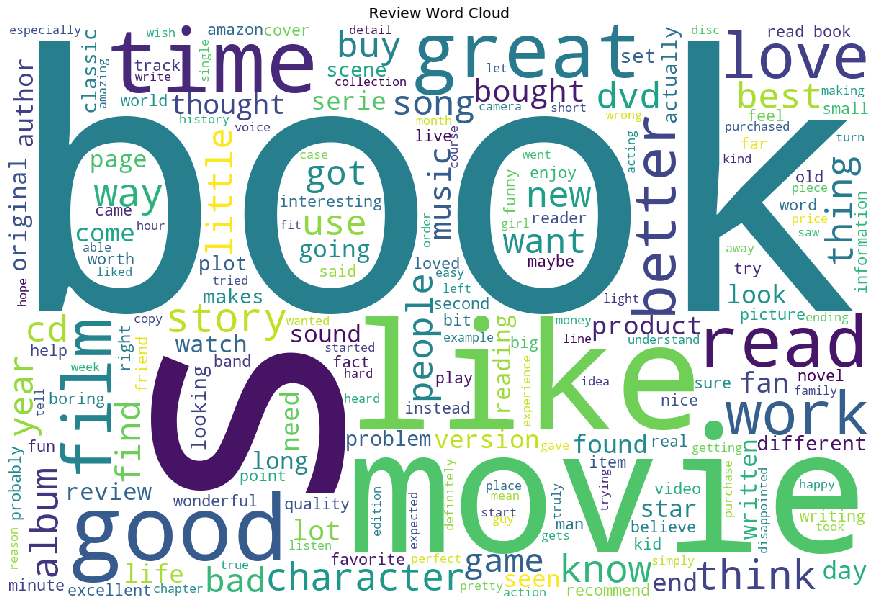

Wall time: 11.3 s


In [23]:
%%time
positiveReviews = ''
negativeReviews = ''
reviews = ''
for index,row in train_df.iterrows():
    sentiment = row['Sentiment']
    if(sentiment==2):
        positiveReviews=positiveReviews+row['Pre_processed'].strip()
    else:
        negativeReviews=negativeReviews+row['Pre_processed'].strip()
    reviews=reviews+row['Pre_processed'].strip()
    
wordcloud = WordCloud(width = 1200, height =800, 
                background_color ='white', 
                stopwords = all_stopwords, 
                min_font_size = 10).generate(reviews) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Review Word Cloud")
plt.show() 

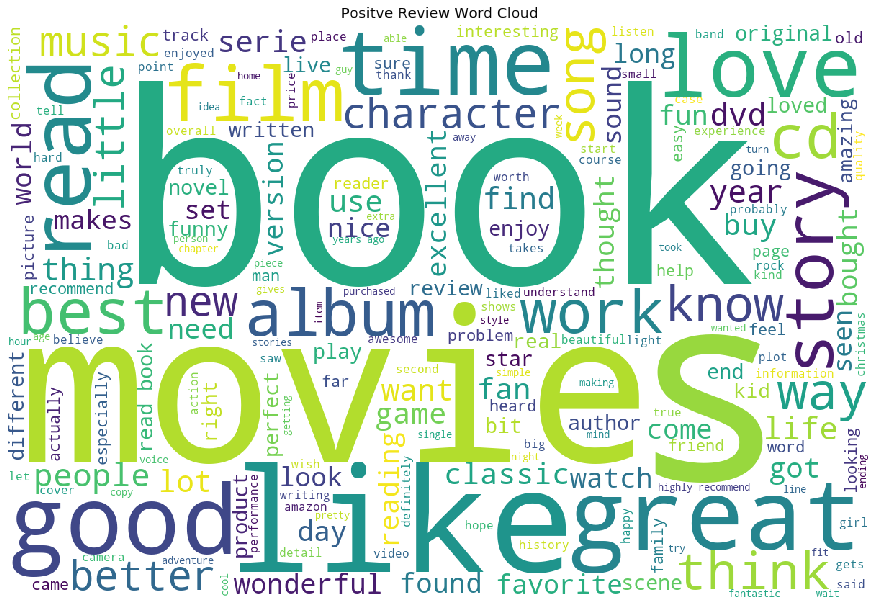

In [24]:
wordcloud = WordCloud(width = 1200, height =800, 
                background_color ='white', 
                stopwords = all_stopwords, 
                min_font_size = 10).generate(positiveReviews) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Positve Review Word Cloud")
plt.show() 


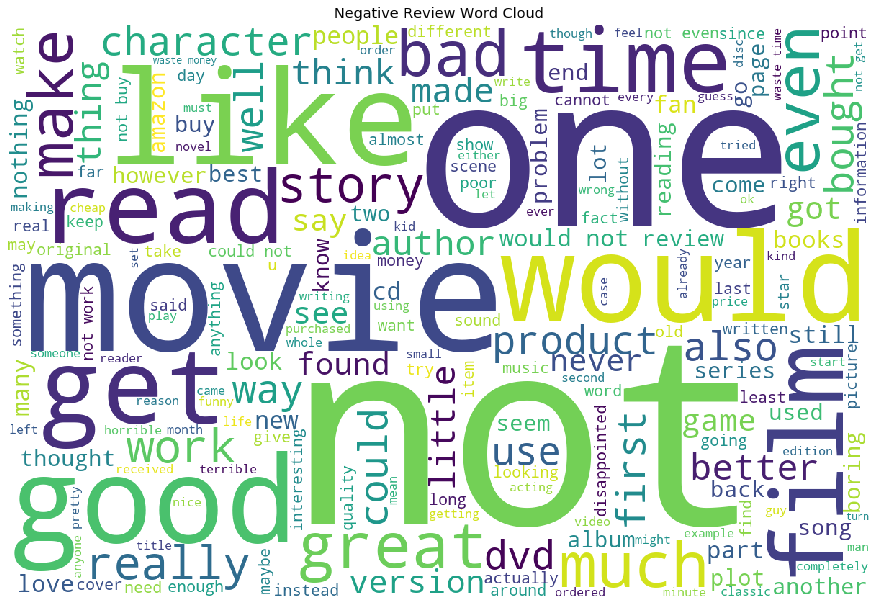

In [25]:

wordcloud = WordCloud(width = 1200, height =800, 
                background_color ='white', 
                stopwords = STOP_WORDS, 
                min_font_size = 10).generate(negativeReviews) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Negative Review Word Cloud")
plt.show() 

[('book', 9199), ('movie', 5843), ('like', 4255), ('good', 3933), ('great', 3718), ('read', 3307), ('it+s', 2937), ('time', 2881), ('love', 2078), ('story', 1953)]
Wall time: 6.96 s


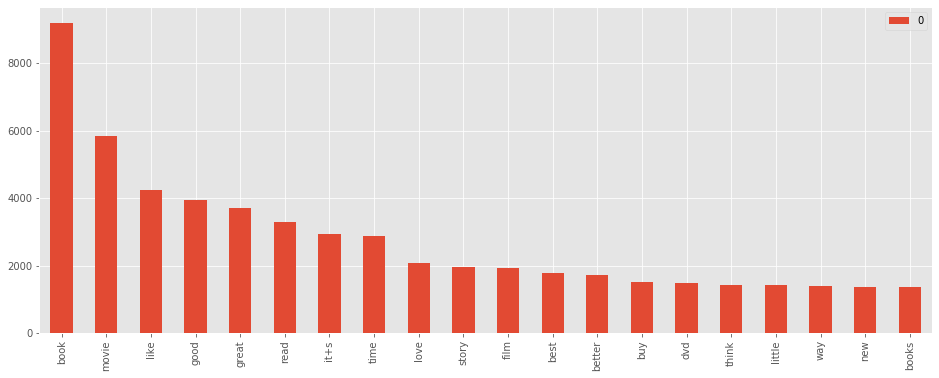

In [26]:
%%time
text_tokens = word_tokenize(reviews)
total_words= [word for word in text_tokens if not word in all_stopwords]
freq_words=FreqDist(total_words)
word_frequency=FreqDist(freq_words)
print(word_frequency.most_common(10))
pd.DataFrame(word_frequency,index=[0]).T.sort_values(by=[0],ascending=False).head(20).plot(kind='bar',figsize=(16,6),grid=True)


[('book', 4930), ('movie', 3034), ('great', 2800), ('good', 2217), ('like', 2072), ('read', 1978), ('it+s', 1613), ('love', 1575), ('time', 1480), ('best', 1322)]


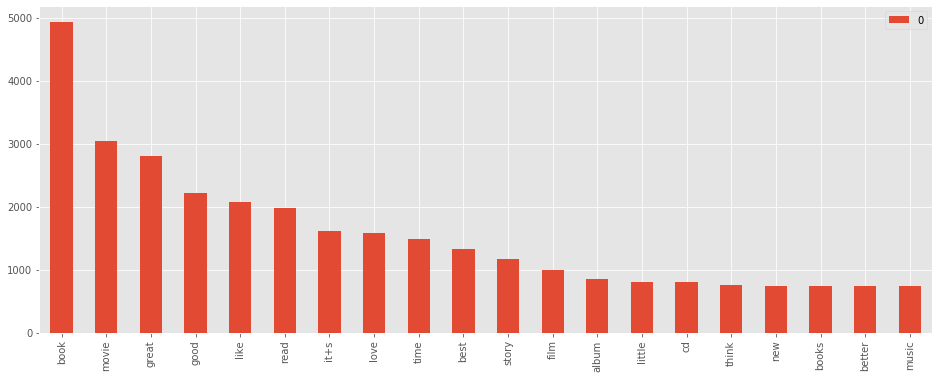

In [27]:
text_tokens = word_tokenize(positiveReviews)
total_words= [word for word in text_tokens if not word in all_stopwords]
freq_words=FreqDist(total_words)
word_frequency=FreqDist(freq_words)
print(word_frequency.most_common(10))
pd.DataFrame(word_frequency,index=[0]).T.sort_values(by=[0],ascending=False).head(20).plot(kind='bar',figsize=(16,6),grid=True)

[('book', 4269), ('movie', 2809), ('like', 2183), ('good', 1716), ('time', 1401), ('read', 1329), ('it+s', 1324), ('bad', 999), ('better', 991), ('buy', 963)]


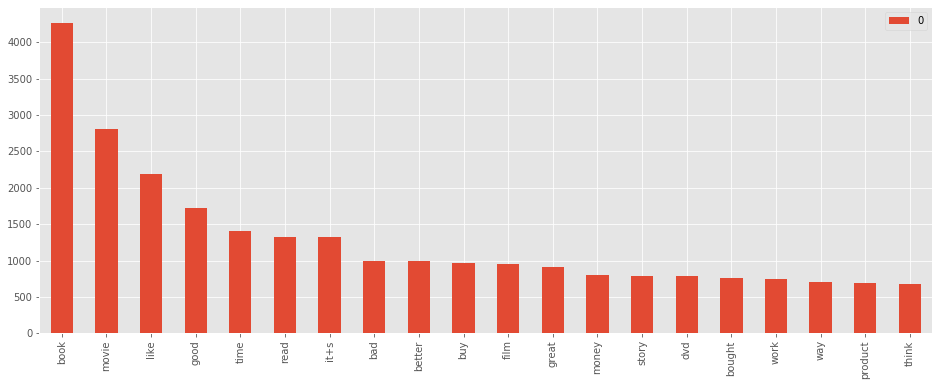

In [28]:
text_tokens = word_tokenize(negativeReviews)
total_words= [word for word in text_tokens if not word in all_stopwords]
freq_words=FreqDist(total_words)
word_frequency=FreqDist(freq_words)
print(word_frequency.most_common(10))
pd.DataFrame(word_frequency,index=[0]).T.sort_values(by=[0],ascending=False).head(20).plot(kind='bar',figsize=(16,6),grid=True)

<BarContainer object of 10 artists>

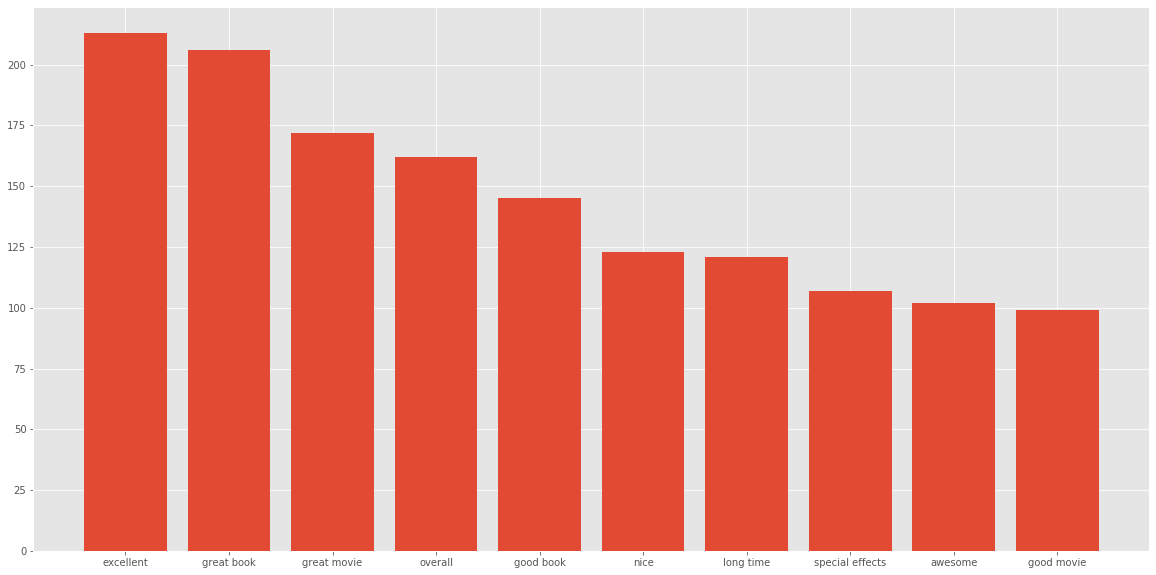

In [29]:
keywords = list()
for keywordList in  train_df['Keywords']:
    for keyword in keywordList:
        if keyword not in all_stopwords:
            keywords.append(keyword)
    
from collections import Counter
counterDict = Counter(keywords)
topDict = dict([(k, v) for k, v in counterDict.items() if v > 1])
sorted_d = dict( sorted(topDict.items(), key=operator.itemgetter(1),reverse=True))
topTen = dict(Counter(sorted_d).most_common(10))
plt.figure(figsize=(20,10))
plt.bar(topTen.keys(),topTen.values())

In [30]:
train_df.head(10)

,Index,Text,Sentiment,Pre_processed,Sentence_count,Review_Length,Word_count,Keywords,Keyword_score,KeyWord_Count,Subjectivity,NeutralScore,VaderScore
0,1,Just what I expected: I wasn't expecting much ...,2,expected not expecting much ordered calipers n...,10,491,71,"[extra battery, hard plastic case]",-0.292,2,0.483,0.898,0.959
1,2,"Garbage: The not accurate at all, constantly r...",1,garbage not accurate constantly resets randoml...,2,87,13,[],0.000,0,0.489,1.000,0.000
2,3,Cheap! You get what you pay for!: I am pretty ...,1,cheap get pay pretty upset first person review...,5,257,37,"[cheap, pretty upset, own hobby]",1.250,3,0.562,0.700,0.556
3,4,"Good quality, but no fraction support: The bui...",2,good quality fraction support build quality ca...,6,514,69,"[good quality, discernible play, extra battery...",0.900,5,0.541,0.888,0.077
4,5,bad quality caliper: This item arrived with an...,1,bad quality caliper item arrived extra piece b...,1,135,22,"[bad quality caliper, extra piece]",-0.700,2,0.356,0.280,-0.821
5,6,not very accurate: I am sorry to say that this...,1,not accurate sorry say caliper not accurate kn...,2,229,38,[pretty darn],0.250,1,0.678,0.944,0.778
6,7,Do not but this Caliper!!!! zero points jumps ...,1,not caliper zero points jumps 0 2 inch put 0 s...,12,255,49,[stable zero point],0.000,1,0.500,0.731,-0.927
7,8,cheap and accuarate!!!: For the price this uni...,2,cheap accuarate price unit exactly needed batt...,5,154,24,"[fine shape, nice touch, cheap]",1.417,3,0.612,1.000,0.490
8,9,"You get what you pay for. . . : For the cost, ...",2,get pay cost it+s good product need needed acc...,10,496,78,"[good product, undue amount, small piece, expe...",-0.050,7,0.414,0.662,-0.171
9,10,Works well after you replace the batteries: Al...,2,works well replace batteries batteries supplie...,6,310,44,"[inaccurate readings, great unit]",0.800,2,0.497,0.916,0.784


In [31]:
train_df.sort_values(by=['Subjectivity'],ascending=False)

,Index,Text,Sentiment,Pre_processed,Sentence_count,Review_Length,Word_count,Keywords,Keyword_score,KeyWord_Count,Subjectivity,NeutralScore,VaderScore
11930,11931,My review: I believe that this book was excell...,2,review believe book excellent opened mind lot ...,3,137,22,[lot things],0.0,1,1.0,0.852,0.750
6771,6772,Enter the Spider: I've always wondered what a ...,2,enter spider always wondered spider know scrap...,3,95,15,[],0.0,0,1.0,1.000,0.572
6756,6757,wrap around bedskirt: Just got it on the bed a...,2,wrap around bedskirt got bed looks wonderful s...,2,71,11,[],0.0,0,1.0,1.000,0.572
6446,6447,One word: GARBAGE: This is the worst cd i have...,1,one word garbage worst cd ever heard lacks con...,3,85,15,[],0.0,0,1.0,0.546,-0.741
10515,10516,"Hungry Hip Scarves, Economy: I had to look clo...",2,hungry hip scarves economy look closely find f...,3,124,18,[hungry hip scarves],0.0,1,1.0,1.000,0.701
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11756,11757,Harve Benard Women+s Plus Size Stretch Pant: P...,1,harve benard women+s plus size stretch pant pr...,2,115,19,[],0.0,0,0.0,1.000,0.000
10355,10356,Might as well have thrown my $40. 00 in the tr...,1,might well thrown 40 00 trash got thing hooked...,7,141,24,[],0.0,0,0.0,0.798,-0.153
347,348,Demasiado incompleto: Tal parece que hubiesen ...,1,demasiado incompleto tal parece que hubiesen e...,6,334,55,[],0.0,0,0.0,1.000,-0.681
1280,1281,Never Received Item !: You asked for Feedback ...,1,never received item asked feedback waiting for...,4,295,46,"[never received item, car charger adapter comp...",0.0,2,0.0,1.000,0.456


In [32]:
train_df.head()

,Index,Text,Sentiment,Pre_processed,Sentence_count,Review_Length,Word_count,Keywords,Keyword_score,KeyWord_Count,Subjectivity,NeutralScore,VaderScore
0,1,Just what I expected: I wasn't expecting much ...,2,expected not expecting much ordered calipers n...,10,491,71,"[extra battery, hard plastic case]",-0.292,2,0.483,0.898,0.959
1,2,"Garbage: The not accurate at all, constantly r...",1,garbage not accurate constantly resets randoml...,2,87,13,[],0.000,0,0.489,1.000,0.000
2,3,Cheap! You get what you pay for!: I am pretty ...,1,cheap get pay pretty upset first person review...,5,257,37,"[cheap, pretty upset, own hobby]",1.250,3,0.562,0.700,0.556
3,4,"Good quality, but no fraction support: The bui...",2,good quality fraction support build quality ca...,6,514,69,"[good quality, discernible play, extra battery...",0.900,5,0.541,0.888,0.077
4,5,bad quality caliper: This item arrived with an...,1,bad quality caliper item arrived extra piece b...,1,135,22,"[bad quality caliper, extra piece]",-0.700,2,0.356,0.280,-0.821


(0, 1.1225242402384894)

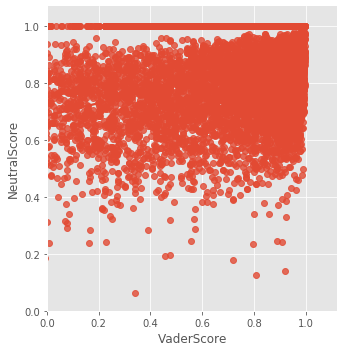

In [33]:
sns.lmplot(x='VaderScore', y='NeutralScore', data=train_df)
plt.ylim(0, None)
plt.xlim(0, None)

(0, 1.1225242402384894)

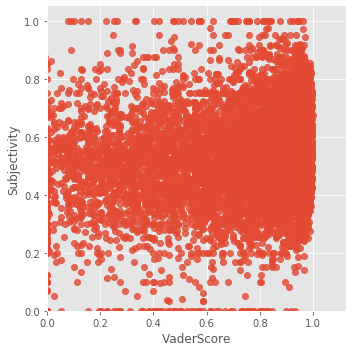

In [34]:
sns.lmplot(x='VaderScore', y='Subjectivity', data=train_df)
plt.ylim(0, None)
plt.xlim(0, None)

(0, 1.0842184735867235)

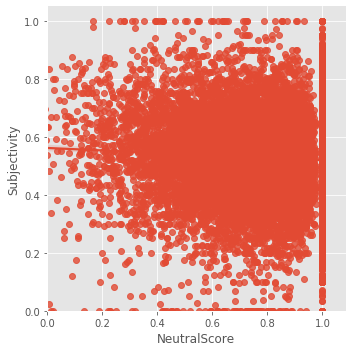

In [35]:
sns.lmplot(x='NeutralScore', y='Subjectivity', data=train_df)
plt.ylim(0, None)
plt.xlim(0, None)

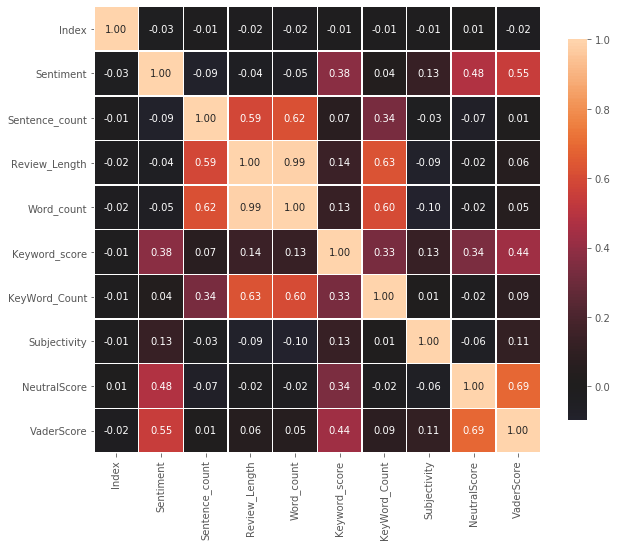

In [36]:
correlation_heatmap(train_df)

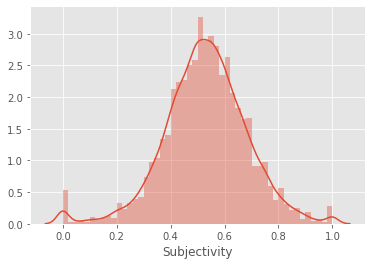

In [37]:
sns.distplot(train_df.Subjectivity)

Text(0, 0.5, 'samples')

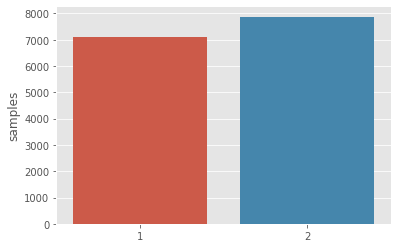

In [38]:
x=train_df.Sentiment.value_counts()
sns.barplot(x.index,x)
plt.gca().set_ylabel('samples')

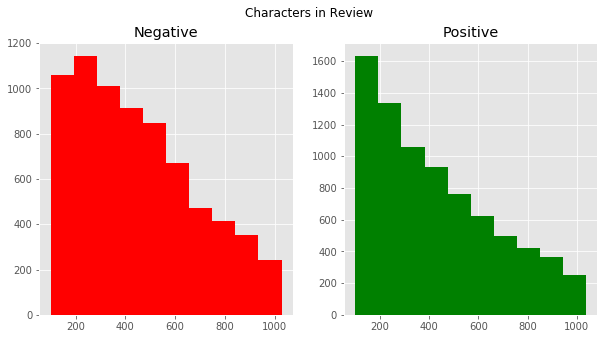

In [39]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
review_len=train_df[train_df['Sentiment']==1]['Text'].str.len()
ax1.hist(review_len,color='red')
ax1.set_title('Negative')
review_len=train_df[train_df['Sentiment']==2]['Text'].str.len()
ax2.hist(review_len,color='green')
ax2.set_title('Positive')
fig.suptitle('Characters in Review')
plt.show()

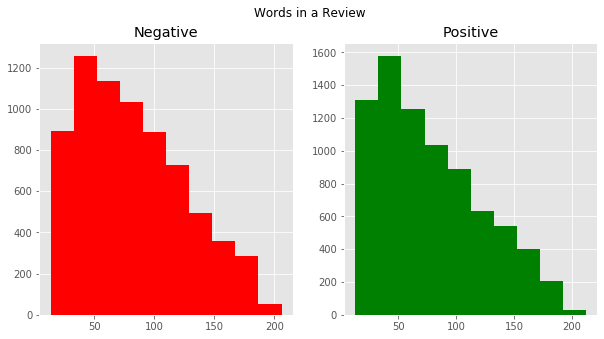

In [40]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
review_len=train_df[train_df['Sentiment']==1]['Text'].str.split().map(lambda x: len(x))
ax1.hist(review_len,color='red')
ax1.set_title('Negative')
review_len=train_df[train_df['Sentiment']==2]['Text'].str.split().map(lambda x: len(x))
ax2.hist(review_len,color='green')
ax2.set_title('Positive')
fig.suptitle('Words in a Review')
plt.show()

Text(0.5, 0.98, 'Average word length in each review')

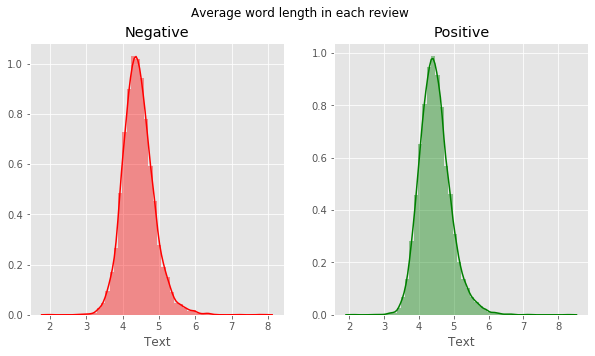

In [41]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train_df[train_df['Sentiment']==1]['Text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Negative')
word=train_df[train_df['Sentiment']==2]['Text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Positive')
fig.suptitle('Average word length in each review')

In [42]:
PostiveButNegativeClassifed = train_df[(train_df['Sentiment']==2) & (train_df['VaderScore']<0)]
NegativeButPostiveClassifed = train_df[(train_df['Sentiment']==1) & (train_df['VaderScore']>0)]

In [43]:

print('PostiveButNegativeClassifed',len(PostiveButNegativeClassifed))
print('NegativeButPostiveClassifed',len(NegativeButPostiveClassifed))

vader_Accuracy = (len(train_df)-(len(PostiveButNegativeClassifed)+len(NegativeButPostiveClassifed)))/len(train_df)*100
print("Vader Accuracy: ",vader_Accuracy)

PostiveButNegativeClassifed 542
NegativeButPostiveClassifed 3553
Vader Accuracy:  72.7


In [44]:
PostiveButNegativeClassifed.head()

,Index,Text,Sentiment,Pre_processed,Sentence_count,Review_Length,Word_count,Keywords,Keyword_score,KeyWord_Count,Subjectivity,NeutralScore,VaderScore
8,9,"You get what you pay for. . . : For the cost, ...",2,get pay cost it+s good product need needed acc...,10,496,78,"[good product, undue amount, small piece, expe...",-0.050,7,0.414,0.662,-0.171
43,44,"Comforting, informative and insightful. . . : ...",2,comforting informative insightful mother+s dea...,8,254,38,[],0.000,0,0.505,0.372,-0.542
108,109,I own the demo and. . . . : its just the way i...,2,demo way jacked animations trails game kicks b...,7,60,10,[],0.000,0,0.400,1.000,-0.296
153,154,5 years old and still going strong: Sad to say...,2,5 years old still going strong sad say 5 years...,8,473,76,[sad],-0.500,1,0.603,0.623,-0.261
161,162,Still working after a year and lots of crushed...,2,still working year lots crushed cans trouble t...,16,618,97,"[long bolt, large washers, works fine, good cu...",1.281,4,0.528,0.714,-0.187


In [45]:
svc_param_grid={'cache_size': [300], 'degree': [3], 'kernel': ['rbf'], 'tol': [0.0011]}
rf_param_grid={'bootstrap': [True], 'max_depth': [None], 'max_features': ['auto'], 'min_samples_leaf': [4], 'min_samples_split': [2], 'n_estimators': [800]}
gb_param_grid={'learning_rate': [0.1], 'max_depth': [5], 'n_estimators': [700]}

In [46]:
import random
rowCount = random.randint(0,10000)
Text = train_df['Text'][rowCount]
Pre_processed = train_df['Pre_processed'][rowCount]
Sentiment = train_df['Sentiment'][rowCount]
print("---------------------------")
print(Text)
print("---------------------------")
print(Pre_processed)
print("---------------------------")
testingReview=vectorizer.transform([Pre_processed])
pred=ScoreVecClassifier.predict(testingReview)
if(Sentiment==pred):
    print("Sentiment Predicted correctly ",Sentiment,pred)
else:
    print("Sentiment Predicted incorrectly ",Sentiment,pred)
    


---------------------------
Excellent - music is really good, brings back memories!!: A friend lent the CD to me and I liked it so much I ordered one for me. I was so happy with the various songs that brought back excellent memories. 
---------------------------
excellent music really good brings back memories friend lent cd liked much ordered one happy various songs brought back excellent memories
---------------------------
Sentiment Predicted correctly  2 2


In [47]:
def isSarcastic(text):
    try:
        tokenized_test = tokenizer.texts_to_sequences([Text])
        x_test = sequence.pad_sequences(tokenized_test, maxlen=200)
        return SarcasmDetectionModel.predict_classes(x_test)[0][0]
    except:
        return 0

In [48]:
isSarcastic

<function __main__.isSarcastic(text)>

In [49]:
#Review=input()
Review="This ScoreVEc Model is amazing sentiment analyzer"
testingReview=vectorizer.transform([Review])
Review=utility.fix_punctuation(Review)
Review=utility.remove_URL(Review)
Review=utility.remove_html(Review)
Review=utility.spacy_pre_processing(Review)
pred=ScoreVecClassifier.predict(testingReview)
if(pred==2):
    print("Positive")
else:
    print("Negative")
    

Positive


In [50]:
accuracy_dict={'ExtraTreesClassifier': 0.87,
 'BernoulliNB': 0.85,
 'SVC': 0.87,
 'LogisticRegression': 0.87,
 'SGDClassifier': 0.86,
 'LinearSVC': 0.86,
 'NuSVC': 0.87}

In [51]:
train_df['Classfier_Prediction'] = train_df['Pre_processed'].progress_apply(lambda x: ScoreVecClassifier.predict(vectorizer.transform([x])))

In [52]:
train_df['Classfier_Confidence'] = train_df['Pre_processed'].progress_apply(lambda x: ScoreVecClassifier.confidence(vectorizer.transform([x])))

In [ ]:
train_df['Classfier_Score'] = train_df['Pre_processed'].progress_apply(lambda x: ScoreVecClassifier.score(vectorizer.transform([x]),accuracy_dict))

In [ ]:
train_df['Sarcasm'] = train_df['Pre_processed'].progress_apply(lambda x: isSarcastic(x))    

In [ ]:
#wrongPredictedDF=train_df[train_df['Sentiment']!=train_df['Classfier_Prediction']]
PredictedDF=train_df[:]
PredictedDF=PredictedDF.drop(columns=['Index','Text','Pre_processed','Keywords','KeyWord_Count','Sentence_count','Review_Length','Word_count','Sarcasm'])
PredictedDF.head(20)

In [ ]:
correlation_heatmap(PredictedDF)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
PredictedDFTest = PredictedDF['Sentiment']
PredictedDFTrain = PredictedDF.drop(columns="Sentiment")
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(PredictedDFTrain,PredictedDFTest, test_size = 0.3, random_state=0, shuffle = True, stratify=train_df['Sentiment'])

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
folds = 3
param_comb = 5
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )
random_search.fit(X_train, y_train)
y_pred = random_search.predict(X_test)
print(random_search.best_estimator_)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm = pd.DataFrame(cm)
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True)

In [ ]:
getConfusionMatrixScore(y_test,y_pred)
